# Geometric distribution

In [1]:
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import math 

# GeomDIM - третья модель моделирования
def geomDIM(n, p = 0.1, m = 5):
    lst = []
    for i in range(n):
        a = random.random()
        e = math.floor(math.log(a,math.e) / math.log(1 - p,math.e) )
        lst.append(e)
        
        
    return lst


# Создание m массивов выборки
def make_vibor(m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(geomDIM(m))
        
    l = 1
    print('Реализация выборки объема %d: '%m)
    print('')
    for k in A:
        print('%d): '%l, end='')
        print(*k)
        l += 1
    return A

<font color='red'> Моделирование выбранных случайных величин </font>

 Для n = 5:

In [2]:
#make_vibor(5)

Для n = 10:

In [3]:
#make_vibor(10)

Для n = 100:

In [4]:
#make_vibor(100)

Для n = 1000:

In [5]:
#make_vibor(1000)

Для n = 10**5:

In [6]:
#make_vibor(10**5)

<font color='red'> Построение эмпирической функции распределения </font> 

In [7]:
# Для удобства уберем вывод
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import math 

# GeomDIM - третья модель моделирования
def geomDIM(n, p = 0.1, m = 5):
    lst = []
    for i in range(n):
        a = random.random()
        e = math.floor(math.log(a,math.e) / math.log(1 - p,math.e) )
        lst.append(e)
        
        
    return lst


# Создание m массивов выборки
def make_vibor(m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(geomDIM(m))
        
    l = 1
    #print('Реализация выборки объема %d: '%m)
    #print('')
    for k in A:
        #print('%d): '%l, end='')
        #print(*k)
        l += 1
    return A

In [104]:
import pylab
import math 
import matplotlib
import numpy as np
import scipy.stats as sc
from scipy.stats import geom
import matplotlib.pyplot as plt
from random import randint

def make_efr(M, n, f_x = -1):

    color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', ]

    upper_list = []
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            #print(i)
            s1 = sorted(set(i)) # вариационный ряд
            capacity_vibor = len(s1)
            
            #словарь: ключ - случайная величина, значение - частота встречаемости
            for k in s1:
                dict_set[k] = [0, 0]

            for t in i: 
                dict_set[t][0] += 1
            
            # Добавление в словарь второго значения - его вероятность 
            for s in dict_set:
                a = dict_set[s][0] / n 
                dict_set[s][1] = float('{:.2f}'.format(a))

            
            lst = []
            for elem in dict_set:
                lst.append([elem, dict_set[elem][1]])
            #print(lst)
            

            #print("Эмпирическая функция для реализации %d выборки объема %s:  "%(sp + 1, n))
            final_sum = 0
            for index in range(len(lst) - 1):
                
                
                #-------------------------------------------------------------upper_limit
                final_sum += lst[index][1]
                #print(lst[index + 1])
                if lst[index ][0] <= f_x <= lst[index + 1][0]:
                    upper_list.append(final_sum)
                
                #-----------------------------------------------------------------------------
                    
                
              
                
                if f_x == -1:
                    
                    x0, y0 = [-2, lst[0][0]], [0,0]
                    x1, y1 = [lst[index][0], lst[index + 1][0]],[final_sum, final_sum]
                    x2, y2 = [lst[len(lst) - 1][0],lst[len(lst) - 1][0] + 2], [1,1]

                    #x3, y3 =[lst[0][0] - 3, lst[len(lst) - 1][0] + 3],[quant, quant]# нахождение квантили


                    plt.grid(True) #Сетка
                    plt.plot(x0,y0, x1,y1, x2, y2, marker = 'o', color = color[sp])

            if lst[len(lst) - 1][0] < f_x:
                    upper_list.append(1)
            #print(upper_list)
        
        if f_x == -1:
            plt.plot(0,0, color = color[sp], label = 'Реализация %d'%(sp+ 1))
            
            pylab.legend ()
            #plt.show()

    return upper_list


from scipy.stats import geom
import matplotlib.pyplot as plt


def make_сdf(p):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
    
    pylab.figure (1)
    ax.plot(x, geom.cdf(x, p), 'bo', ms = 8, label = 'geom cdf')
    #ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

    rv = sc.geom(p)
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()

    
def upper_limit(M, n , f_x):
    lol = make_efr(M, n, f_x)
    lol.sort(reverse = True)
        
    fin = -10000 # просто так
    #--------------------------------Ищем разность
    for i in range(len(lol) - 1):
        for k in range(len(lol)):
            res = lol[i] - lol[k]
            if res > fin:
                fin = res


    print('Точная верхняя граница выборки объема %d: '%n, abs(fin))
    
    

<font color='blue'>Эфр для выборок объема 5: </font> 

In [9]:
M = make_vibor(5)

[]

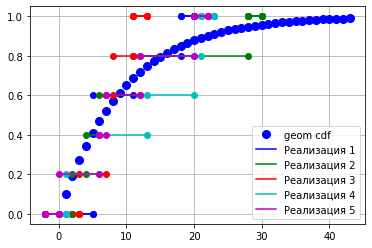

In [10]:
make_сdf(0.1)
make_efr(M, 5)



<font color='blue'>Эфр для выборок объема 10: </font> 

In [11]:
M = make_vibor(10)

[]

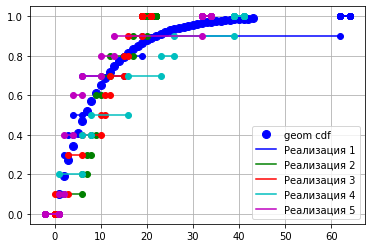

In [12]:
make_сdf(0.1)
make_efr(M, 10)

<font color='blue'>Эфр для выборок объема 100: </font> 

In [13]:
M = make_vibor(100)

[]

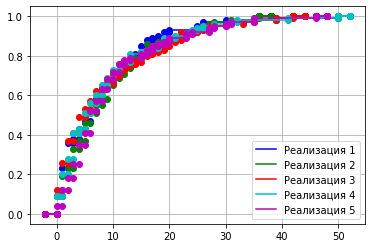

In [14]:
make_efr(M, 100)

<font color='blue'>Эфр для выборок объема 1000: </font> 

In [15]:
M = make_vibor(1000)

[]

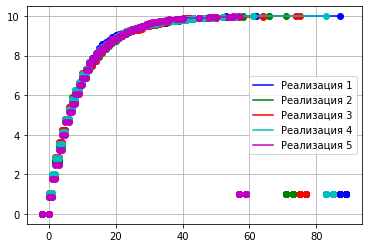

In [16]:
make_efr(M, 100)

<font color='blue'>Эфр для выборок объема 10**5: </font> 

In [17]:
M = make_vibor(10**5)

[]

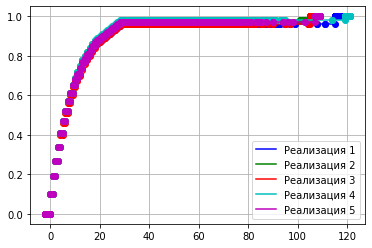

In [18]:
make_efr(M, 10**5)

<font color='red'> Нахождение точной верхней границы </font> 

<font color='green'> Для n = 5: </font> 

In [19]:
M = make_vibor(5)

In [20]:
upper_limit(M, 5, 4)

Точная верхняя граница выборки объема 5:  0.6000000000000001


<font color='green'> Для n = 10: </font> 

In [21]:
M = make_vibor(10)

In [22]:
upper_limit(M, 10, 4)

Точная верхняя граница выборки объема 10:  0.4000000000000001


<font color='green'> Для n = 100: </font> 

In [23]:
M = make_vibor(100)

In [24]:
upper_limit(M, 100, 4)

Точная верхняя граница выборки объема 100:  0.13


<font color='green'> Для n = 1000: </font> 

In [25]:
M = make_vibor(1000)

In [26]:
upper_limit(M, 1000, 4)

Точная верхняя граница выборки объема 1000:  0.09000000000000002


<font color='green'> Для n = 10**5: </font> 

In [27]:
M = make_vibor(10**5)

In [28]:
upper_limit(M, 10**5, 4)

Точная верхняя граница выборки объема 100000:  0.07


<font color='red'> Построение вариационного ряда </font> 

Для удобства уберем все выводы

In [29]:
import timeit
import matplotlib.pyplot as plt
import random
import numpy as np
import pylab
import math 

# GeomDIM - третья модель моделирования
def geomDIM(n, p = 0.1, m = 5):
    lst = []
    for i in range(n):
        a = random.random()
        e = math.floor(math.log(a,math.e) / math.log(1 - p,math.e) )
        lst.append(e)
        
        
    return lst


# Создание m массивов выборки
def make_vibor(m):
    A = []
    for i in range(5):
        row = []
        A.append(row)
    
        row.append(geomDIM(m))
    return A
    ''' 
    l = 1
    print('Реализация выборки объема %d: '%m)
    print('')
    for k in A:
        print('%d): '%l, end='')
        print(*k)
        l += 1
    '''


In [30]:
import scipy.stats as st
import pandas as pd

r = st.geom.rvs(0.1, size=10)
#print(r)
s = pd.Series([1,3,3,4,4,4,5,7,9,15])
s.quantile(0.14)

3.0

In [31]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
def make_var_row(n, M):
    dict_set = {}
    
    print('Вариационные ряды для 5 реализаций выборки, объема  %d:  '%n)
    print('')
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            
            #заносим все различные знаения выборки в словарь
            for k in s1:
                dict_set[str(k)] = 0
            
            #считаем сколько раз каждое из них встречается
            for t in i:
                dict_set[str(t)] += 1
            
            # Переделываем знчения в список
            dict_viborka = {k: [v] for k, v in dict_set.items()}
            
            #делаем красиво
            #print('')
            #print('Вариационный ряд выборки %s объема %d: '%(sp + 1, n) )
            
            # создаем DataFrame и выводим его на экран
            df = pd.DataFrame(dict_viborka,index = list('f'))    
            display(df)

Для n = 5

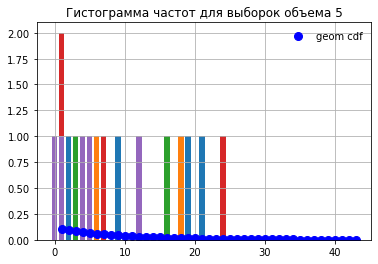

In [209]:
M1 = make_vibor(5)
make_pmf(0.1)
make_var_row(5, M1)

Для n = 10

In [33]:
M2 = make_vibor(10)
make_var_row(10, M2)

Вариационные ряды для 5 реализаций выборки, объема  10:  



,0,1,2,3,4,7,15
f,1,1,3,1,1,2,1


,1,3,5,8,12,15,29,34,53
f,1,1,1,2,1,1,1,1,1


,0,2,6,9,11,14
f,3,1,1,2,1,2


,1,2,3,7,8,11,12,17,24
f,1,1,1,2,1,1,1,1,1


,1,2,3,4,7,9,10,12,29
f,1,1,1,2,1,1,1,1,1


Для n = 100:

In [34]:
M3 = make_vibor(100)
make_var_row(100, M3)

Вариационные ряды для 5 реализаций выборки, объема  100:  



,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,26,29,32,52,63
f,14,10,8,9,4,6,6,3,6,5,...,4,2,2,1,1,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,30,31,34,48
f,15,8,6,4,2,7,9,5,3,8,...,1,1,1,2,1,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,22,23,26,27,29,34,42,48,49,61
f,3,15,5,6,6,8,7,7,3,6,...,1,2,1,2,1,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,22,23,26,33,34,51
f,7,8,9,6,11,5,7,7,7,2,...,1,1,2,1,1,1,2,2,1,1


,0,1,2,3,4,5,6,7,8,9,...,17,21,23,24,26,28,31,33,37,75
f,10,12,12,6,4,5,5,1,8,7,...,1,2,1,2,1,1,1,1,1,1


make_var_row(100, M3)

Для n = 1000:

In [35]:
M4 = make_vibor(1000)

In [36]:
make_var_row(1000, M4)

Вариационные ряды для 5 реализаций выборки, объема  1000:  



,0,1,2,3,4,5,6,7,8,9,...,41,45,46,47,48,49,50,51,54,56
f,97,94,84,80,65,57,58,41,47,37,...,4,1,2,1,3,2,1,2,1,1


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,55,65
f,82,97,96,72,83,61,49,42,48,37,...,2,1,1,1,1,2,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,57,60,62,64,66
f,109,80,83,67,74,61,46,36,47,34,...,1,1,1,1,3,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,46,47,50,63,66,80
f,93,89,87,77,47,68,53,45,47,48,...,2,1,1,2,2,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,40,43,44,53,55,62,63,64,67,70
f,97,95,67,76,80,59,57,52,41,36,...,1,1,1,1,1,1,1,2,1,1


Для n = 10**5

In [37]:
M5 = make_vibor(10**5)

In [38]:
make_var_row(10**5, M5)

Вариационные ряды для 5 реализаций выборки, объема  100000:  



,0,1,2,3,4,5,6,7,8,9,...,82,83,85,86,87,88,89,92,94,105
f,10116,8916,8062,7353,6604,5772,5386,4694,4269,3959,...,1,1,2,1,2,2,2,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,83,84,86,87,89,94,98,99,110,118
f,10036,9020,8051,7213,6613,5877,5339,4749,4223,3845,...,1,1,1,1,2,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,84,85,88,91,93,95,98,101,103,107
f,9997,8948,8169,7300,6582,5791,5337,4798,4277,3851,...,1,2,1,1,1,2,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,85,86,88,89,95,100,105,110,121,144
f,9963,9031,8088,7317,6515,5733,5348,4736,4295,3828,...,1,1,3,1,1,1,1,1,1,1


,0,1,2,3,4,5,6,7,8,9,...,88,89,90,91,98,100,102,104,105,109
f,9804,8976,7985,7288,6687,5921,5424,4716,4234,3911,...,3,2,1,1,1,1,2,2,1,1


<font color='blue'> Нахождение квантильи </font>

In [39]:
def upper_limit_quan(M, n , f_x):
    lol = make_efr(M, n, f_x)
    lol.sort(reverse = True)
        



    print(lol)

In [40]:
upper_limit_quan(M,5, 2)

[5454.8, 5414.200000000001, 5404.8, 5399.0, 5395.0, 3827.4, 3808.0, 3803.8, 3778.2, 3761.8]


In [41]:
import scipy.stats as st
import pandas as pd
import numpy as np

def find_quantile(level):
    geom_numbers = st.geom.rvs(0.1, size=10)

    s = pd.Series(geom_numbers)

    quan = s.quantile(level)
    print('Квантиль уровня ', level,':',  float('{:.3f}'.format(quan)))

    
    

In [42]:
find_quantile(0.1)

Квантиль уровня  0.1 : 1.0


In [43]:
find_quantile(0.5)

Квантиль уровня  0.5 : 9.0


In [44]:
find_quantile(0.7)

Квантиль уровня  0.7 : 9.3


# Гистограмма частот


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [276]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
def make_var_row(n, M):
    dict_set = {}
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            
            #заносим все различные знаения выборки в словарь
            for k in s1:
                dict_set[str(k)] = 0
            
            #считаем сколько раз каждое из них встречается
            for t in i:
                dict_set[str(t)] += 1
            
            # Переделываем знчения в список
            lin_x = []
            lin_y = []
            dict_viborka = {k: v for k, v in dict_set.items()}
            for i in dict_viborka:
                if int(i) != 0:
                    lin_x.append(int(i))
                if int(i) != 0:
                    lin_y.append(dict_viborka[i]/ int(i) )
     
                
            
            #print(lin_x, lin_y)
            
            
            plt.title('Гистограмма частот для выборок объема %s' %n)
            plt.bar(lin_x, lin_y)
            #делаем красиво
            #print('')
            #print('Вариационный ряд выборки %s объема %d: '%(sp + 1, n) )
            
            
            
            # создаем DataFrame и выводим его на экран
            df = pd.DataFrame(dict_viborka,index = list('f'))

        
            #display(df)

In [285]:
#функция для построения вар.рядов для 5 реализаций  выборки M для n
def make_poligon(n, M):
    dict_set = {}
    
    
    for sp in range(5):
        dict_set = {}
        for i in M[sp]:
            s1 = sorted(set(i))
            
            #заносим все различные знаения выборки в словарь
            for k in s1:
                dict_set[str(k)] = 0
            
            #считаем сколько раз каждое из них встречается
            for t in i:
                dict_set[str(t)] += 1
            
            # Переделываем знчения в список
            lin_x = []
            lin_y = []
            dict_viborka = {k: v for k, v in dict_set.items()}
            for i in dict_viborka:
                lin_x.append(int(i))
                if dict_viborka[i] != 0:
                    lin_y.append( dict_viborka[i] /int(i))
                else:
                    lin_y.append(0.01)
            
            #print(lin_x, lin_y)
            
            
                plt.title('Полигон частот для выборок объема %s' %n)
                plt.bar(lin_x, lin_y)
                plt.plot(lin_x, lin_y)
            #делаем красиво
            #print('')
            #print('Вариационный ряд выборки %s объема %d: '%(sp + 1, n) )
            
            
            # создаем DataFrame и выводим его на экран
            df = pd.DataFrame(dict_viborka,index = list('f'))

        
            display(df)

In [271]:
def make_pmf(p):
    fig, ax = plt.subplots(1, 1)
    x = np.arange(geom.ppf(0.01, p), geom.ppf(0.99, p))
    
    pylab.figure (1)
    ax.plot(x, geom.pmf(x, p), 'bo', ms = 8, label = 'geom pmf')
    #ax.vlines(x, 0, geom.pmf(x, p), colors='b', lw=5, alpha=0.5)

    rv = sc.geom(p)
    
    #ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')
    plt.grid(True) #Сетка
    ax.legend(loc='best', frameon = False)
    #plt.show()


[[[4, 5, 19, 1, 4]], [[14, 2, 6, 0, 10]], [[1, 8, 0, 4, 3]], [[28, 6, 2, 28, 3]], [[4, 13, 18, 2, 6]]]


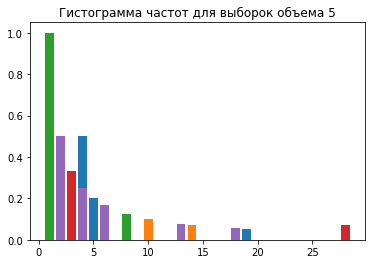

In [286]:
M1 = make_vibor(5)
print(M1)
#make_pmf(0.1)
make_var_row(5, M1)

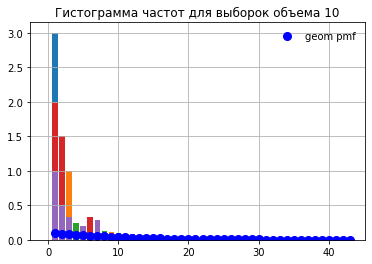

In [256]:
M1 = make_vibor(10)
make_pmf(0.1)
make_var_row(10, M1)

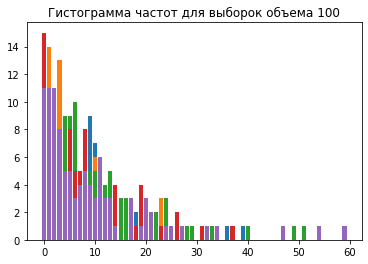

In [184]:
M1 = make_vibor(100)
make_var_row(100, M1)

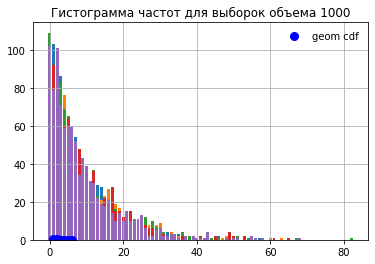

In [211]:
M1 = make_vibor(1000)
make_pmf(0)
make_var_row(1000, M1)

ZeroDivisionError: division by zero

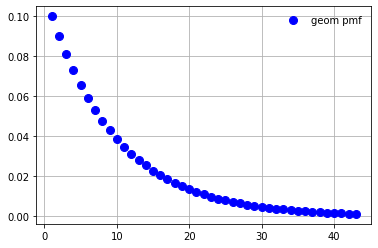

In [234]:
M1 = make_vibor(10**5)
make_pmf(0.1)
make_var_row(10**5, M1)

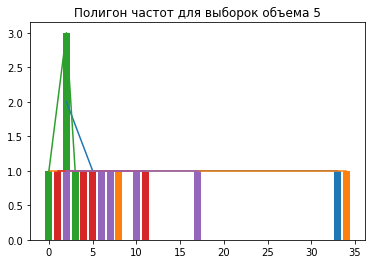

In [195]:
M1 = make_vibor(5)
make_poligon(5, M1)

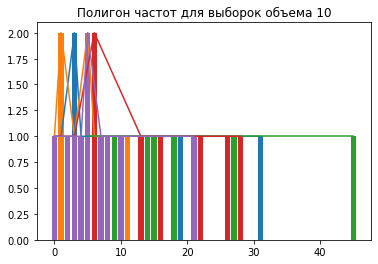

In [197]:
M1 = make_vibor(10)
make_poligon(10, M1)

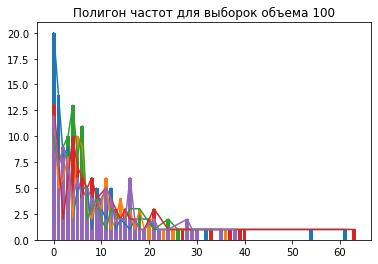

In [198]:
M1 = make_vibor(100)
make_poligon(100, M1)

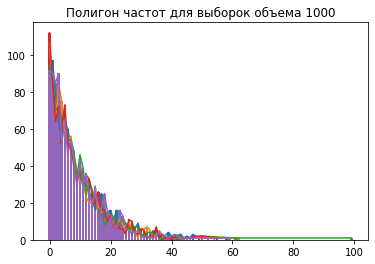

In [199]:
M1 = make_vibor(1000)
make_poligon(1000, M1)

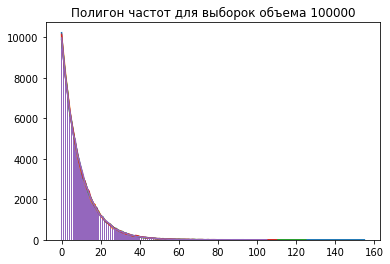

In [200]:
M1 = make_vibor(10**5)
make_poligon(10**5, M1)

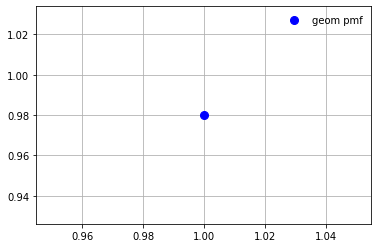

In [291]:
make_pmf(0.98)